##### In this project, I will be studying bank customers who have been ending the relationship with the bank.
##### It is important to retain customer, by able to predict who are likely to chrun, we can sent out target offers and keep them being our customers given they have been a good and stable customer.

In [2]:
# Import pandas & numpy 
import pandas as pd
import numpy as np

# Import data viz 
import seaborn as sns 
import matplotlib.pyplot as plt 

In [3]:
# Load data set! 
# Set display option to show all columns
pd.set_option('display.max_columns', None)
df = pd.read_csv('Churn Modeling.csv')

In [4]:
# By exploring the data! we can drop some columns that are not needed. 
# ['RowNumber','CustomerId','Surname','Gender'] #Dropping gender due to ethical reason. 
# I have some doubt about Geography, what does it mean? Customer is from that specific country? 
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
# Data exploration 
# df.info() # There are no missing variable
# let's drop some columns that I talked about above 
new_df = df.drop(columns=['RowNumber','CustomerId','Surname','Gender'], axis=1)

In [10]:
# How many countries are there in the data set? 
# We only have 3 country, France being represented the most. 
new_df['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [12]:
# Our target variable here is Exited, we want to predict who accurately exited. So that we can give them promotion and retain them. 
# As you can see the data is not balance, we have only about 20% of the customer who actually churn. 
# But not a big problem, we can use stratify to make sure this is accounted for. 
new_df['Exited'].value_counts(normalize=True)

0    0.7963
1    0.2037
Name: Exited, dtype: float64

In [14]:
# Age: Our customer are mostly younger generation. 75% are Millenium or lower 
# Credit Score: Medium credit score is around 652. Whis is fair accourind to forbes. 580 - 669 is a fair range. 
# Tenure: Almost 50% of our custmer has been with us for 5 years. 
# Balance: Medium balance is around 97K, which is high? 
# Salary: Medium salary is 100K, which is consider a middel calss income. 
new_df[['Age', 'CreditScore', 'Tenure', 'Balance', 'EstimatedSalary']].describe()

,Age,CreditScore,Tenure,Balance,EstimatedSalary
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,38.921800,650.528800,5.012800,76485.889288,100090.239881
std,10.487806,96.653299,2.892174,62397.405202,57510.492818
min,18.000000,350.000000,0.000000,0.000000,11.580000
25%,32.000000,584.000000,3.000000,0.000000,51002.110000
50%,37.000000,652.000000,5.000000,97198.540000,100193.915000
75%,44.000000,718.000000,7.000000,127644.240000,149388.247500
max,92.000000,850.000000,10.000000,250898.090000,199992.480000


In [16]:
# Feature enginerring 
# I can create loyalty. Tenure/Age. Higher the loyalty we should observe less exited rate 
new_df['loyality'] = new_df['Tenure']/new_df['Age']

In [19]:
# As we can see it does not make that much difference. But let's put it. 
new_df.groupby('Exited')['loyality'].mean()

Exited
0    0.143443
1    0.116411
Name: loyality, dtype: float64

In [24]:
# Now we make dummy columns. 
new_dummy_df = pd.get_dummies(new_df, columns=['Geography'], drop_first=True)

In [26]:
# Let's divide the data into X and Y 
X = new_dummy_df.drop(columns='Exited')
y = new_dummy_df['Exited']

In [51]:
# I will be using XG Boost, so we don't need to scale data. 
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_predict
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
from xgboost import XGBClassifier
import xgboost as xgb

In [34]:
# Make a train test split. 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Model instant 
claf_model = XGBClassifier(objective='binary:logistic',random_state = 0)

In [35]:
# Create a parameter we want to go over with.
param_grid = {
    'max_depth': [2,6],
    'n_estimators': [50,100],
    'learning_rate': [0.01, 0.3],
    'min_child_weight':[1,5]
}

# Scoring methods 
scoring = {'accuracy', 'precision', 'recall', 'f1'}

# We want to refit with f1 score. 
grid_search = GridSearchCV(claf_model, param_grid=param_grid, cv=5, scoring=scoring, refit = 'f1')
grid_search.fit(X_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Librar

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=0, ...),
             param_grid={'learning_rate': [0.01, 0.3], 'max_depth': [2, 6],
                         'min_child_weight': [1, 5],
                         'n_estimators': [50, 100]},
             refit='f1', scoring={'recall', 'f1', 'precision', 'accuracy'})

In [49]:
grid_search.best_score_
# This is saving my best model from grid search
best_estimator = grid_search.best_estimator_

# Make y_pred using best model. 
y_pred = best_estimator.predict(X_test)

# Calculate the all the scores needed for testing. 
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")


Accuracy: 0.8675
Precision: 0.8597
Recall: 0.8675
F1-score: 0.8554


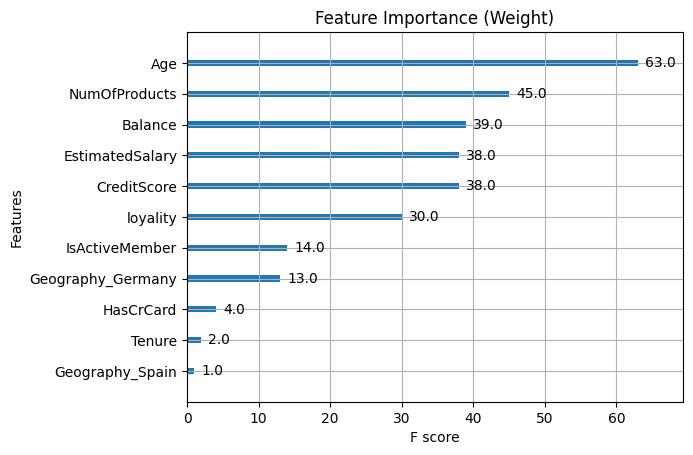

In [53]:
# This is how the frature impact our model. 
xgb.plot_importance(best_estimator, importance_type='weight', title='Feature Importance (Weight)')
plt.show()

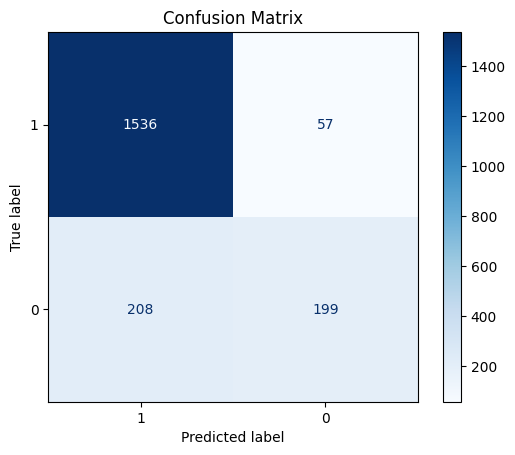

In [57]:
# Plot confusion matrix. 
cm = confusion_matrix(y_test, y_pred, labels=best_estimator.classes_)

# Display the confusion matrix using ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[1, 0])
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix')
plt.show()